In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sn

df = pd.read_csv('formated_data_new.csv')#.drop("Positive rate in reviews in %", axis = 1)
df.head(5)

,Game ID,Genres,Developers,Publishers,Release date,Current price in €,Number of reviews,Positive rate in reviews in %,SteamDB score in %,Minimum requirements,Min configuration class
0,568070,"['Action', 'Adventure', 'Indie']",['Triplevision Games'],['Graffiti Games'],2019-08-23,3.12,58,60.0,57.31,"{'Processor': ' 2ghz dual core cpu', 'Memory':...",1
1,568090,"['Action', 'Indie']",['Waygetter Electronics'],"['Little Flag Software, LLC']",2016-12-28,2.39,2027,91.0,87.13,"{'Processor': ' 2.0 ghz dual core processor', ...",1
2,568130,"['Action', 'Adventure', 'Indie']",['Nickana Studio'],['Nickana Studio'],2017-01-03,3.99,20,65.0,59.00,"{'Processor': ' 1.4ghz or faster', 'Memory': '...",0
3,568180,"['Action', 'Adventure', 'Indie']",['Sword Twin Studios Ltd.'],['Sword Twin Studios Ltd.'],2017-03-31,0.00,12,92.0,72.42,"{'Processor': ' 2.5 ghz dual core', 'Memory': ...",1
4,568200,"['Casual', 'Indie']",['Bruno Freitas'],['Bruno Freitas'],2016-12-19,1.99,28,93.0,77.30,"{'Processor': ' intel/amd dual core 1,2ghz', '...",1


## Introduction

Our objective is to see the influence of the min configuration recommendation on the popularity of a game. This factor is evaluated thanks to the SteamDB grade (depends on the grades attributed by the users and the number of reviews). We want to analyse the distribution of these grades and the class but also the other factors such as the genre, and the price (date?)

Text(0.5,1,'Correlation matrix of the principal variables')

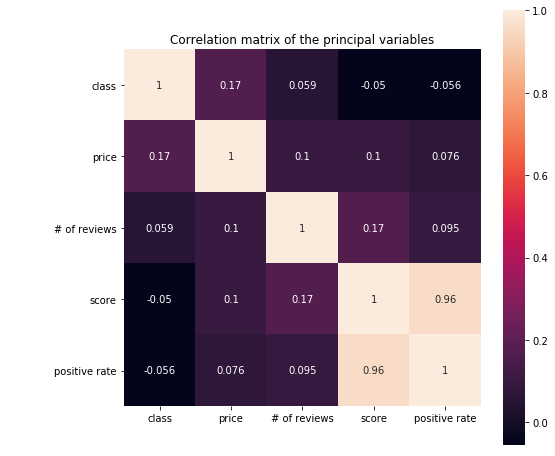

In [2]:
plt.figure(figsize=(8,8))
corrMatrix = df[["Min configuration class", "Current price in €", "Number of reviews", "SteamDB score in %", "Positive rate in reviews in %"]].corr()
sn.heatmap(corrMatrix, annot=True, square=True, xticklabels = ["class", "price", "# of reviews", "score", "positive rate"], yticklabels = ["class", "price", "               # of reviews", "score", "positive rate"]).set_title("Correlation matrix of the principal variables")

We can see that at first sight the different variables are not very correlated, we need to define new variables and selected specific parameters for them to refine our work. Lets procede to a precise analysis of each of the variables.

## Analysis of the distribution of the classes

In [3]:
df["Min configuration class"].value_counts()

0    9869
1    3580
2    2331
3    1350
Name: Min configuration class, dtype: int64

(-11.049987533310716,
 11.002380480306464,
 -11.259974595409263,
 11.161738762075123)

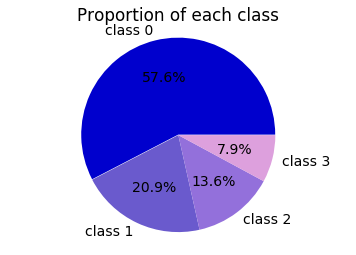

In [4]:
wedgeprops = {"linewidth": 4, 'width':2, "edgecolor":"k"}
fig1, ax1 = plt.subplots()
mpl.rcParams['font.size'] = 14.0
ax1.pie(df["Min configuration class"].value_counts(),radius = 10, labels = ["class 0", "class 1", "class 2" ,"class 3"], colors = ["mediumblue", "slateblue", "mediumpurple", "plum"], explode = (0.05, 0, 0, 0), autopct='%1.1f%%', textprops=dict(color="black"))
plt.title("Proportion of each class", color="black")
ax1.axis('equal')

Class 0 is the most predominant. The higher are the min configuration, the less there are games. 

## Analysis of the distribution of the Steam DB score

In [5]:
for i in range(0,4):
    print("Stats of of Min configuration of class ", i)
    print(df[df['Min configuration class']==i]['SteamDB score in %'].describe(), "\n")

Stats of of Min configuration of class  0
count    9869.000000
mean       64.460656
std        13.886910
min        21.010000
25%        55.140000
50%        65.250000
75%        75.080000
max        96.270000
Name: SteamDB score in %, dtype: float64 

Stats of of Min configuration of class  1
count    3580.000000
mean       64.028115
std        14.090395
min        18.520000
25%        53.537500
50%        64.695000
75%        75.125000
max        96.520000
Name: SteamDB score in %, dtype: float64 

Stats of of Min configuration of class  2
count    2331.000000
mean       63.735332
std        13.489052
min        23.000000
25%        54.170000
50%        64.070000
75%        73.905000
max        94.960000
Name: SteamDB score in %, dtype: float64 

Stats of of Min configuration of class  3
count    1350.000000
mean       61.587022
std        13.498737
min        18.230000
25%        51.612500
50%        62.075000
75%        71.540000
max        95.690000
Name: SteamDB score in %, dtype

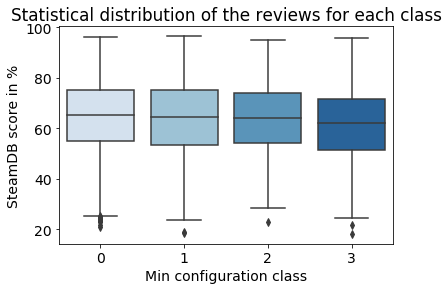

In [6]:
ax = sn.boxplot(x="Min configuration class", y="SteamDB score in %", palette="Blues", data=df).set_title("Statistical distribution of the reviews for each class")


Text(0.5,1,'Mean of the SteamDB score for each class')

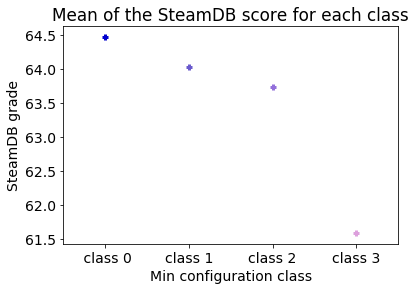

In [7]:
figure = plt.figure()
axes = figure.add_subplot(111)
axes.scatter([0,1,2,3], y = [np.mean(df[df['Min configuration class']==i]['SteamDB score in %']) for i in range(0,4)],
             marker = '+', c = ["mediumblue", "slateblue", "mediumpurple", "plum"], linewidth = 3)
axes.set_xlim(-0.5, 3.5)
axes.set_xlabel('Min configuration class')
axes.set_ylabel('SteamDB grade')
axes.xaxis.set_ticks(range(4))
axes.xaxis.set_ticklabels([' class 0', 'class 1', 'class 2', 'class 3'])
plt.title("Mean of the SteamDB score for each class")

The mean of the score seems to decrease more the recommended config are high.

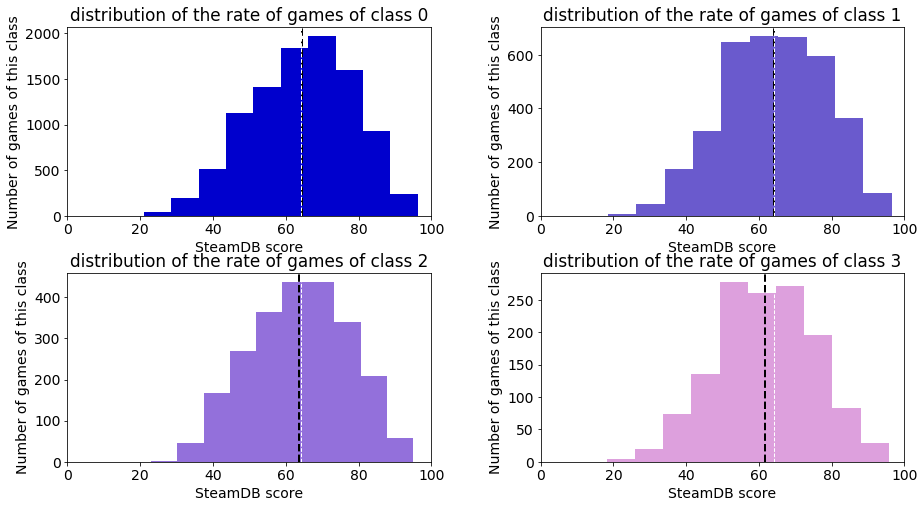

In [8]:
class_0 = df[df['Min configuration class']==0]
class_1 = df[df['Min configuration class']==1]
class_2 = df[df['Min configuration class']==2]
class_3 = df[df['Min configuration class']==3]

figure = plt.figure(figsize=(15,8))
plt.gcf().subplots_adjust(wspace = 0.3, hspace = 0.3)

axes = figure.add_subplot(221)
axes.set_xlim(0,100)
plt.hist(class_0['SteamDB score in %'], color="mediumblue")
plt.title("distribution of the rate of games of class 0")
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this class")
plt.axvline(class_0['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df['SteamDB score in %'].mean(), color='white', linestyle='dashed', linewidth=1)

axes = figure.add_subplot(222)
axes.set_xlim(0,100)
plt.hist(class_1['SteamDB score in %'], color="slateblue")
plt.title("distribution of the rate of games of class 1")
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this class")
plt.axvline(class_1['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df['SteamDB score in %'].mean(), color='white', linestyle='dashed', linewidth=1)

axes = figure.add_subplot(223)
axes.set_xlim(0,100)
plt.hist(class_2['SteamDB score in %'], color="mediumpurple")
plt.title("distribution of the rate of games of class 2")
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this class")
plt.axvline(class_2['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df['SteamDB score in %'].mean(), color='white', linestyle='dashed', linewidth=1)

axes = figure.add_subplot(224)
axes.set_xlim(0,100)
plt.hist(class_3['SteamDB score in %'], color="plum")
plt.title("distribution of the rate of games of class 3")
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this class")
plt.axvline(class_3['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(df['SteamDB score in %'].mean(), color='white', linestyle='dashed', linewidth=1)

plt.show()

The mean of the grades of class 3 is a bit lower than those of class 0. We can see that this is because the distribution is bit different. For class 3, not many games have a very high grade (above 90). Furthermore, the grade are uch more distributed with many more games having a low grade (below 50) 

In [10]:
low_grades = df[df['SteamDB score in %']<50]
very_high_grades = df[df['SteamDB score in %']>80]

print("overall proportion of low grades: ",  round(100*len(low_grades)/len(df),2), "%")
print("class 0 proportion of low grades: ", round(100*len(low_grades[low_grades['Min configuration class']==0])/len(class_0),2), "%")
print("class 3 proportion of low grades: ", round(100*len(low_grades[low_grades['Min configuration class']==3])/len(class_3),2), "%", "\n")

print("overall proportion of very high grades: ",  round(100*len(very_high_grades)/len(df),2))
print("class 0 proportion of very high grades: ", round(100*len(very_high_grades[very_high_grades['Min configuration class']==0])/len(class_0),2), "%")
print("class 3 proportion of very high grades: ", round(100*len(very_high_grades[very_high_grades['Min configuration class']==3])/len(class_3),2), "%")

overall proportion of low grades:  14.58 %
class 0 proportion of low grades:  13.99 %
class 3 proportion of low grades:  17.56 % 

overall proportion of very high grades:  13.33
class 0 proportion of very high grades:  13.89 %
class 3 proportion of very high grades:  8.59 %


Class 3 has a higher propotion of low graded games and a much lower proportion of games with very high grades. Class 0 games have a  higher proportion of games with very high grades than the average

## Analysis of the number of reviews according to the class

In [11]:
for i in range(0,4):
    print("Number of reviews for class", i)
    print(df[df['Min configuration class']==i]['Number of reviews'].describe(), "\n")

Number of reviews for class 0
count     9869.000000
mean       227.651028
std       1225.163584
min          1.000000
25%         10.000000
50%         27.000000
75%         89.000000
max      48827.000000
Name: Number of reviews, dtype: float64 

Number of reviews for class 1
count     3580.000000
mean       428.341061
std       2504.473669
min          0.000000
25%         11.000000
50%         33.000000
75%        126.000000
max      78179.000000
Name: Number of reviews, dtype: float64 

Number of reviews for class 2
count     2331.000000
mean       495.398970
std       3395.338543
min          2.000000
25%         10.000000
50%         25.000000
75%         96.000000
max      85491.000000
Name: Number of reviews, dtype: float64 

Number of reviews for class 3
count     1350.000000
mean       627.913333
std       4249.289974
min          2.000000
25%          9.000000
50%         23.000000
75%         76.000000
max      80911.000000
Name: Number of reviews, dtype: float64 



The mean of the number of reviews per game for class 3 is much higher. The game are more sophisticated and are for a more dedicated community. Thus, the gamers are more likely to leave reviews. Whereas, the mean of the number of reviews per game for class 0 is much lower than average. As the games are likely to be less time-consuming and probably less work was given to it, many games don't have many reviews.

In [12]:
df[df['Number of reviews']>1000].groupby('Min configuration class')['Game ID'].count()

Min configuration class
0    400
1    228
2    155
3     88
Name: Game ID, dtype: int64

Even if the mean of the number of review, the vast majority of games have below 100 reviews. The mean of class 3 is much higer but the majority of games with a lot of reviews (above 1000) are of class 0.

Text(0,0.5,'Positive rate in reviews')

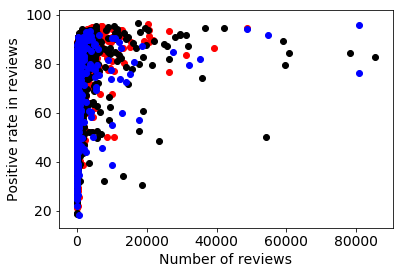

In [13]:
plt.scatter(df[df["Min configuration class"]==0]['Number of reviews'], df[df["Min configuration class"]==0]['SteamDB score in %'], color = "red")
plt.scatter(df[df["Min configuration class"]==1]['Number of reviews'], df[df["Min configuration class"]==1]['SteamDB score in %'], color = "black")
plt.scatter(df[df["Min configuration class"]==2]['Number of reviews'], df[df["Min configuration class"]==2]['SteamDB score in %'], color = "black")
plt.scatter(df[df["Min configuration class"]==3]['Number of reviews'], df[df["Min configuration class"]==3]['SteamDB score in %'], color = "blue")

plt.xlabel("Number of reviews")
plt.ylabel("Positive rate in reviews")

## Analysis of the genres according to the class

In [14]:
Action = df[df['Genres'].str.contains("Action") == True]
Adventure = df[df['Genres'].str.contains("Adventure") == True]
RPG = df[df['Genres'].str.contains("RPG") == True]
Strategy = df[df['Genres'].str.contains("Strategy") == True]
Simulation = df[df['Genres'].str.contains("Simulation") == True]
Casual = df[df['Genres'].str.contains("Casual") == True]
Indie = df[df['Genres'].str.contains("Indie") == True]
Sports = df[df['Genres'].str.contains("Sports") == True]

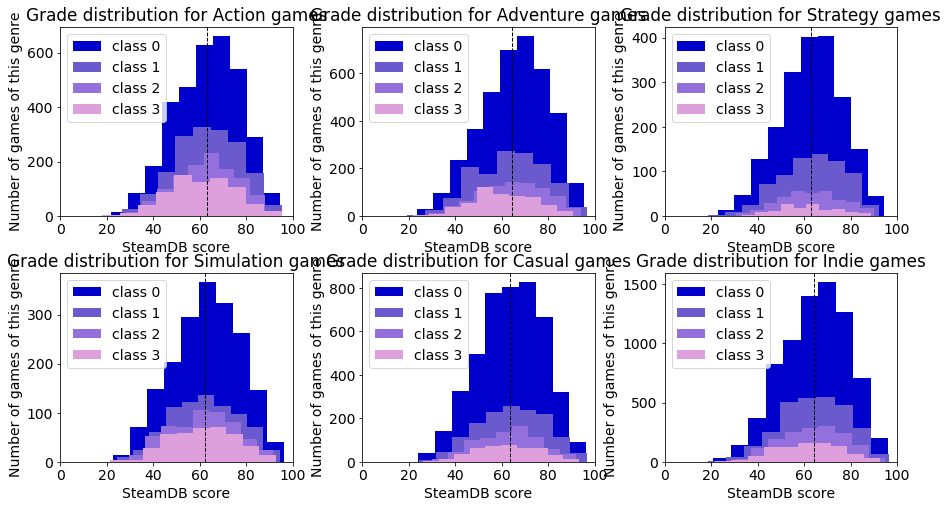

In [15]:
figure = plt.figure(figsize=(15,8))
plt.gcf().subplots_adjust(wspace = 0.3, hspace = 0.3)

axes = figure.add_subplot(231)
axes.set_xlim(0,100)
plt.hist(Action[Action['Min configuration class']==0]['SteamDB score in %'], color="mediumblue", label = 'class 0')
plt.hist(Action[Action['Min configuration class']==1]['SteamDB score in %'], color="slateblue", label = 'class 1')
plt.hist(Action[Action['Min configuration class']==2]['SteamDB score in %'], color="mediumpurple", label = 'class 2')
plt.hist(Action[Action['Min configuration class']==3]['SteamDB score in %'], color="plum", label = 'class 3')
plt.legend()
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this genre")
plt.title("Grade distribution for Action games")
plt.axvline(Action['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=1)


axes = figure.add_subplot(232)
axes.set_xlim(0,100)
plt.hist(Adventure[Adventure['Min configuration class']==0]['SteamDB score in %'], color="mediumblue", label = 'class 0')
plt.hist(Adventure[Adventure['Min configuration class']==1]['SteamDB score in %'], color="slateblue", label = 'class 1')
plt.hist(Adventure[Adventure['Min configuration class']==2]['SteamDB score in %'], color="mediumpurple", label = 'class 2')
plt.hist(Adventure[Adventure['Min configuration class']==3]['SteamDB score in %'], color="plum", label = 'class 3')
plt.legend()
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this genre")
plt.title("Grade distribution for Adventure games")
plt.axvline(Adventure['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=1)

axes = figure.add_subplot(233)
axes.set_xlim(0,100)
plt.hist(Strategy[Strategy['Min configuration class']==0]['SteamDB score in %'], color="mediumblue", label = 'class 0')
plt.hist(Strategy[Strategy['Min configuration class']==1]['SteamDB score in %'], color="slateblue", label = 'class 1')
plt.hist(Strategy[Strategy['Min configuration class']==2]['SteamDB score in %'], color="mediumpurple", label = 'class 2')
plt.hist(Strategy[Strategy['Min configuration class']==3]['SteamDB score in %'], color="plum", label = 'class 3')
plt.legend()
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this genre")
plt.title("Grade distribution for Strategy games")
plt.axvline(Strategy['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=1)

axes = figure.add_subplot(234)
axes.set_xlim(0,100)
plt.hist(Simulation[Simulation['Min configuration class']==0]['SteamDB score in %'], color="mediumblue", label = 'class 0')
plt.hist(Simulation[Simulation['Min configuration class']==1]['SteamDB score in %'], color="slateblue", label = 'class 1')
plt.hist(Simulation[Simulation['Min configuration class']==2]['SteamDB score in %'], color="mediumpurple", label = 'class 2')
plt.hist(Simulation[Simulation['Min configuration class']==3]['SteamDB score in %'], color="plum", label = 'class 3')
plt.legend()
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this genre")
plt.title("Grade distribution for Simulation games")
plt.axvline(Simulation['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=1)

axes = figure.add_subplot(235)
axes.set_xlim(0,100)
plt.hist(Casual[Casual['Min configuration class']==0]['SteamDB score in %'], color="mediumblue", label = 'class 0')
plt.hist(Casual[Casual['Min configuration class']==1]['SteamDB score in %'], color="slateblue", label = 'class 1')
plt.hist(Casual[Casual['Min configuration class']==2]['SteamDB score in %'], color="mediumpurple", label = 'class 2')
plt.hist(Casual[Casual['Min configuration class']==3]['SteamDB score in %'], color="plum", label = 'class 3')
plt.legend()
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this genre")
plt.title("Grade distribution for Casual games")
plt.axvline(Casual['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=1)

axes = figure.add_subplot(236)
axes.set_xlim(0,100)
plt.hist(Indie[Indie['Min configuration class']==0]['SteamDB score in %'], color="mediumblue", label = 'class 0')
plt.hist(Indie[Indie['Min configuration class']==1]['SteamDB score in %'], color="slateblue", label = 'class 1')
plt.hist(Indie[Indie['Min configuration class']==2]['SteamDB score in %'], color="mediumpurple", label = 'class 2')
plt.hist(Indie[Indie['Min configuration class']==3]['SteamDB score in %'], color="plum", label = 'class 3')
plt.legend()
plt.xlabel("SteamDB score")  
plt.ylabel("Number of games of this genre")
plt.title("Grade distribution for Indie games")
plt.axvline(Indie['SteamDB score in %'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.show()

There doesn't seem to be any correlation betwen the genre of the game and the rate given by the users. However, these chats show that there isn't the same distribution of classes for each genres. For instance, it seem that Strategy and Casual games don't need to have important material as the porportion of class 2/3 is very low. However, Sports , Simulation and Action games, whose graphics are much more evolved and rapid apparently need more high tech material.

In [16]:
print("proportion of class 3 : ", 100*len(df[df['Min configuration class']==3])/len(df))
print("proportion of class 3 for simulation game: ", 100*len(Simulation[Simulation['Min configuration class']==3])/len(Simulation))

proportion of class 3 :  7.880910683012259
proportion of class 3 for simulation game:  10.774784782004998


## Analysis of the price according to the class

In [17]:
for i in range(0,4):
    print("Price for class", i)
    print(df[df['Min configuration class']==i]['Current price in €'].describe(), "\n")

Price for class 0
count    9869.000000
mean        3.302861
std         5.077279
min         0.000000
25%         0.390000
50%         1.590000
75%         4.090000
max        79.990000
Name: Current price in €, dtype: float64 

Price for class 1
count    3580.000000
mean        3.967712
std         5.417281
min         0.000000
25%         0.550000
50%         1.990000
75%         4.990000
max        59.990000
Name: Current price in €, dtype: float64 

Price for class 2
count    2331.000000
mean        5.433398
std         6.741659
min         0.000000
25%         0.590000
50%         3.490000
75%         8.190000
max        59.990000
Name: Current price in €, dtype: float64 

Price for class 3
count    1350.000000
mean        6.160407
std         7.183868
min         0.000000
25%         0.475000
50%         3.990000
75%         9.790000
max        69.990000
Name: Current price in €, dtype: float64 



In [18]:
class_0_f = df.loc[(df['Min configuration class']==0) & (df['Current price in €']==0)]
class_1_f = df.loc[(df['Min configuration class']==1) & (df['Current price in €']==0)]
class_2_f = df.loc[(df['Min configuration class']==2) & (df['Current price in €']==0)]
class_3_f = df.loc[(df['Min configuration class']==3) & (df['Current price in €']==0)]

print("proportion of free games in class 0 :", 100*len(class_0_f)/len(class_0))
print("proportion of free games in class 1 :", 100*len(class_1_f)/len(class_1))
print("proportion of free games in class 2 :", 100*len(class_2_f)/len(class_2))
print("proportion of free games in class 3 :", 100*len(class_3_f)/len(class_3))

proportion of free games in class 0 : 15.371364879927045
proportion of free games in class 1 : 13.435754189944134
proportion of free games in class 2 : 19.81981981981982
proportion of free games in class 3 : 22.666666666666668


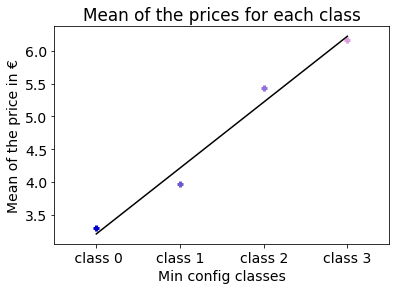

In [19]:
figure = plt.figure()
axes = figure.add_subplot(111)
axes.set_xlim(-0.5, 3.5)
axes.set_xlabel('Min configuration class')
axes.set_ylabel('SteamDB grade')
axes.xaxis.set_ticks(range(4))
axes.xaxis.set_ticklabels([' class 0', 'class 1', 'class 2', 'class 3'])
plt.title("Mean of the prices for each class")

x = np.array([0,1,2,3])
y = np.array([np.mean(df[df['Min configuration class']==i]['Current price in €']) for i in range(0,4)]) 
n = np.size(x) 

x_mean = np.mean(x) 
y_mean = np.mean(y) 
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean
  
plt.xlabel('Min config classes') 
plt.ylabel('Mean of the price in €') 

y_pred = b1 * x + b0 
  
plt.scatter(x, y, c = ["mediumblue", "slateblue", "mediumpurple", "plum"], marker = '+', linewidth = 3) 
plt.plot(x, y_pred, color = 'black') 

We can clearly see that the price and the class that we have created are correlated. The games of class 3 are in average much pricier than the games of class 0.

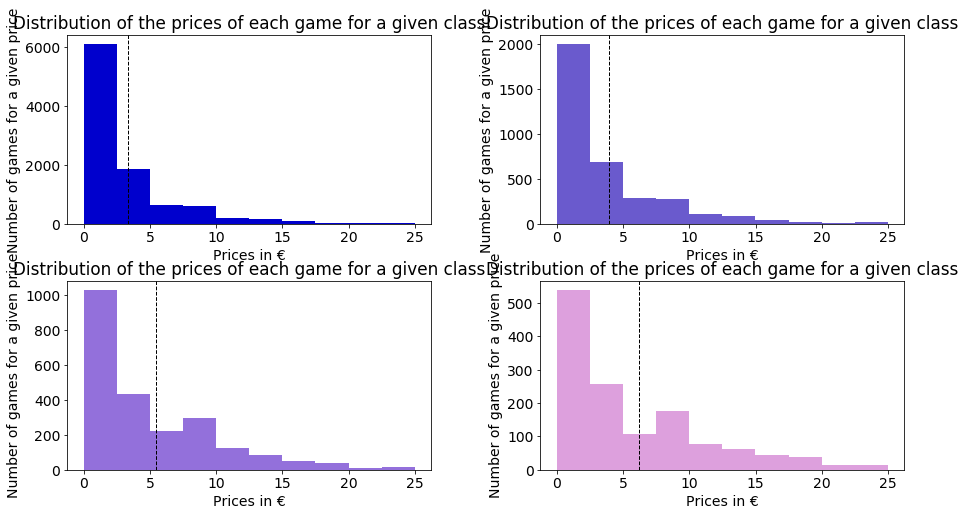

In [20]:
figure = plt.figure(figsize=(15,8))
plt.gcf().subplots_adjust(wspace = 0.3, hspace = 0.3)

axes = figure.add_subplot(221)
plt.hist(class_0[class_0['Current price in €']<25]['Current price in €'], color="mediumblue")
plt.axvline(class_0['Current price in €'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Prices in €")  
plt.ylabel("Number of games for a given price")
plt.title("Distribution of the prices of each game for a given class")

axes = figure.add_subplot(222)
plt.hist(class_1[class_1['Current price in €']<25]['Current price in €'], color="slateblue")
plt.axvline(class_1['Current price in €'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Prices in €")  
plt.ylabel("Number of games for a given price")
plt.title("Distribution of the prices of each game for a given class")

axes = figure.add_subplot(223)
plt.hist(class_2[class_2['Current price in €']<25]['Current price in €'], color="mediumpurple")
plt.axvline(class_2['Current price in €'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Prices in €")  
plt.ylabel("Number of games for a given price")
plt.title("Distribution of the prices of each game for a given class")

axes = figure.add_subplot(224)
plt.hist(class_3[class_3['Current price in €']<25]['Current price in €'], color="plum")
plt.axvline(class_3['Current price in €'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("Prices in €")  
plt.ylabel("Number of games for a given price")
plt.title("Distribution of the prices of each game for a given class")

plt.show()

It seems that the games with high minimum configuration are thus pricier and have less good ratings. We can make the assumption that as the games have a higher price and demand more performant hardware/software, the public using these games are usually more critical. The users are harsher and will thus give bad grades to these games that do not meet what they expected

In [21]:
for p in np.arange(0,60,0.5):
    zozo = df.loc[(df["Current price in €"]>p)]
    print(p)
    c = np.corrcoef([0,1,2,3], [np.mean(zozo[zozo['Min configuration class']==i]['SteamDB score in %']) for i in range(0,4)])
    print(c[0][1])

0.0
-0.8881862682541468
0.5
-0.938639240968379
1.0
-0.9486852930805981
1.5
-0.947953777144663
2.0
-0.9468771889817961
2.5
-0.9559685803447121
3.0
-0.9513785872159467
3.5
-0.9543045763628407
4.0
-0.9668302961625987
4.5
-0.9675465606894035
5.0
-0.9726612804711353
5.5
-0.9740667228679837
6.0
-0.9803018085645661
6.5
-0.9685664886775558
7.0
-0.9623328643211743
7.5
-0.96060089330619
8.0
-0.9822563653490041
8.5
-0.9758848079893286
9.0
-0.9677227127239205
9.5
-0.9742976664512688
10.0
-0.8941478467108416
10.5
-0.8977173498304626
11.0
-0.9585540653820542
11.5
-0.9745164321474425
12.0
-0.9629942540213935
12.5
-0.9039706927935471
13.0
-0.9423413742251706
13.5
-0.9442982400573496
14.0
-0.9620892975510901
14.5
-0.9676068285188203
15.0
-0.8457629757944516
15.5
-0.8309696154519413
16.0
-0.8085591058765065
16.5
-0.802476812725818
17.0
-0.7962233456926335
17.5
-0.7843655114111159
18.0
-0.6265308105355921
18.5
-0.6192433366706581
19.0
-0.5934386212687749
19.5
-0.5756001787583894
20.0
-0.5294185188996117


Text(0.5,1,'Correlation matrix')

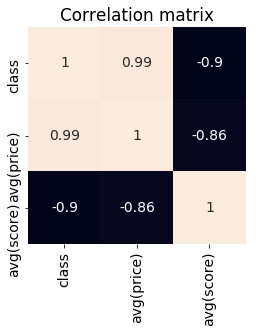

In [22]:
data = {'Min configuration class':  [0,1,2,3],
        'mean of price': [np.mean(df[df['Min configuration class']==i]['Current price in €']) for i in range(0,4)],
        'mean of grades': [np.mean(df[df['Min configuration class']==i]['SteamDB score in %']) for i in range(0,4)]
        }
mean_table = pd.DataFrame(data, columns=['Min configuration class','mean of price','mean of grades'])

corrMatrix = mean_table[['Min configuration class','mean of price','mean of grades']].corr()

sn.heatmap(corrMatrix, annot=True, cbar=False, square=True, xticklabels = ["class", "avg(price)", "avg(score)"], yticklabels = ["class", "avg(price)", "avg(score)"]).set_title("Correlation matrix")

We can see here that the mean of the price and the mean of the grades are highly correlated with the classes that we established

slope b1 = -0.89
intercept b0 = 64.79
squared error = 0.94
mean squared error = 0.23
root mean square error = 0.48
R^2 = 0.81


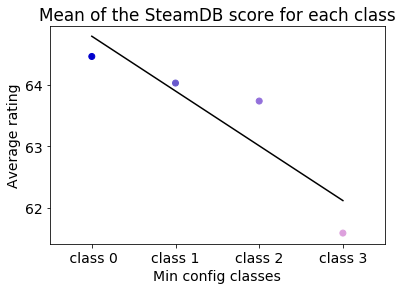

In [23]:
figure = plt.figure()
axes = figure.add_subplot(111)
axes.set_xlim(-0.5, 3.5)
axes.set_xlabel('Min configuration class')
axes.set_ylabel('SteamDB grade')
axes.xaxis.set_ticks(range(4))
axes.xaxis.set_ticklabels([' class 0', 'class 1', 'class 2', 'class 3'])
plt.title("Mean of the SteamDB score for each class")

x = np.array([0,1,2,3])  
y = np.array([np.mean(df[df['Min configuration class']==i]['SteamDB score in %']) for i in range(0,4)]) 
n = np.size(x) 
  
x_mean = np.mean(x) 
y_mean = np.mean(y) 
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 
print('slope b1 =',  round(b1,2))  
print('intercept b0 =',  round(b0,2))  
  
plt.xlabel('Min config classes') 
plt.ylabel('Average rating') 

y_pred = b1 * x + b0 
  
plt.scatter(x, y, c = ["mediumblue", "slateblue", "mediumpurple", "plum"]) 
plt.plot(x, y_pred, color = 'black') 

error = y - y_pred 
se = np.sum(error**2) 
print('squared error =',  round(se,2)) 
  
mse = se/n  
print('mean squared error =',  round(mse,2)) 
  
rmse = np.sqrt(mse) 
print('root mean square error =',  round(rmse,2)) 
  
SSt = np.sum((y - y_mean)**2) 
R2 = 1- (se/SSt) 
print('R^2 =',  round(R2,2)) 

slope b1 = -1.43
intercept b0 = 68.76
squared error = 0.58
mean squared error = 0.15
root mean square error = 0.38
R^2 = 0.95


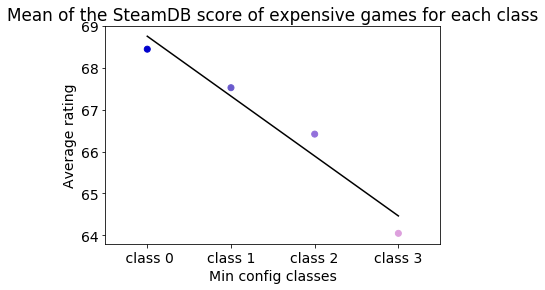

In [24]:
figure = plt.figure()
axes = figure.add_subplot(111)
axes.set_xlim(-0.5, 3.5)
axes.set_xlabel('Min configuration class')
axes.set_ylabel('SteamDB grade')
axes.xaxis.set_ticks(range(4))
axes.xaxis.set_ticklabels([' class 0', 'class 1', 'class 2', 'class 3'])
plt.title("Mean of the SteamDB score of expensive games for each class")

x = np.array([0,1,2,3])
zo = df[df["Current price in €"]>5]
y = np.array([np.mean(zo[zo['Min configuration class']==i]['SteamDB score in %']) for i in range(0,4)]) 
n = np.size(x) 
  
x_mean = np.mean(x) 
y_mean = np.mean(y) 
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 
  
b1 = Sxy/Sxx 
b0 = y_mean-b1*x_mean 
print('slope b1 =',  round(b1,2))  
print('intercept b0 =',  round(b0,2))  
  
plt.xlabel('Min config classes') 
plt.ylabel('Average rating') 

y_pred = b1 * x + b0 
  
plt.scatter(x, y, c = ["mediumblue", "slateblue", "mediumpurple", "plum"]) 
plt.plot(x, y_pred, color = 'black') 

error = y - y_pred 
se = np.sum(error**2) 
print('squared error =',  round(se,2)) 
  
mse = se/n  
print('mean squared error =',  round(mse,2)) 
  
rmse = np.sqrt(mse) 
print('root mean square error =',  round(rmse,2)) 
  
SSt = np.sum((y - y_mean)**2) 
R2 = 1- (se/SSt) 
print('R^2 =',  round(R2,2)) 

By removing low priced games, the slope is more important and the R square is closer to 1